In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:
Titanic = pd.read_csv("task_1.csv")
Titanic.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [3]:
missing_values_summary = Titanic.isnull().sum()
print(missing_values_summary)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [4]:
description = Titanic.describe()
print(description)


       PassengerId    Survived      Pclass         Age       SibSp  \
count   418.000000  418.000000  418.000000  332.000000  418.000000   
mean   1100.500000    0.363636    2.265550   30.272590    0.447368   
std     120.810458    0.481622    0.841838   14.181209    0.896760   
min     892.000000    0.000000    1.000000    0.170000    0.000000   
25%     996.250000    0.000000    1.000000   21.000000    0.000000   
50%    1100.500000    0.000000    3.000000   27.000000    0.000000   
75%    1204.750000    1.000000    3.000000   39.000000    1.000000   
max    1309.000000    1.000000    3.000000   76.000000    8.000000   

            Parch        Fare  
count  418.000000  417.000000  
mean     0.392344   35.627188  
std      0.981429   55.907576  
min      0.000000    0.000000  
25%      0.000000    7.895800  
50%      0.000000   14.454200  
75%      0.000000   31.500000  
max      9.000000  512.329200  


In [5]:
median_age = Titanic['Age'].median()
Titanic['Age'].fillna(median_age, inplace=True)


In [6]:
median_fare = Titanic['Fare'].median()
Titanic['Fare'].fillna(median_fare, inplace=True)


In [7]:
# Drop the 'Cabin' column
Titanic.drop(columns=['Cabin'], inplace=True)


In [8]:
missing_values_summary = Titanic.isnull().sum()
print(missing_values_summary)


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


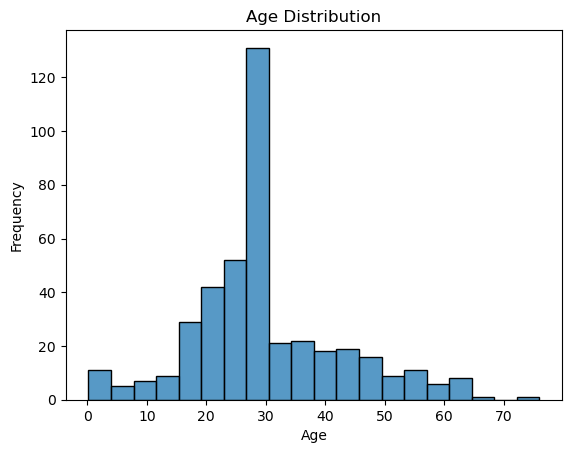

In [9]:
sns.histplot(data=Titanic, x='Age', bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()


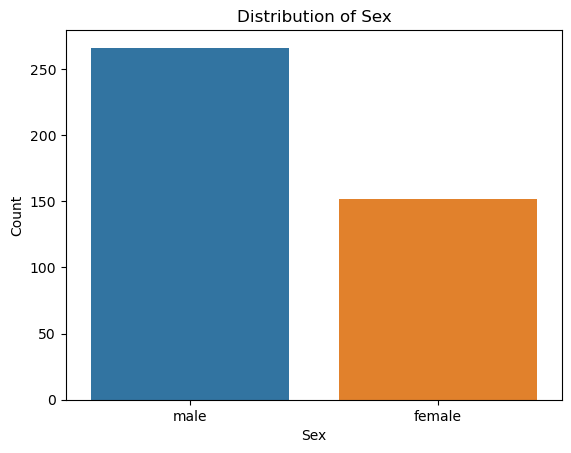

In [10]:
sns.countplot(data=Titanic, x='Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Distribution of Sex')
plt.show()


C:\Users\ASUS 1\AppData\Local\Temp\ipykernel_12536\3764780605.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = Titanic.corr()


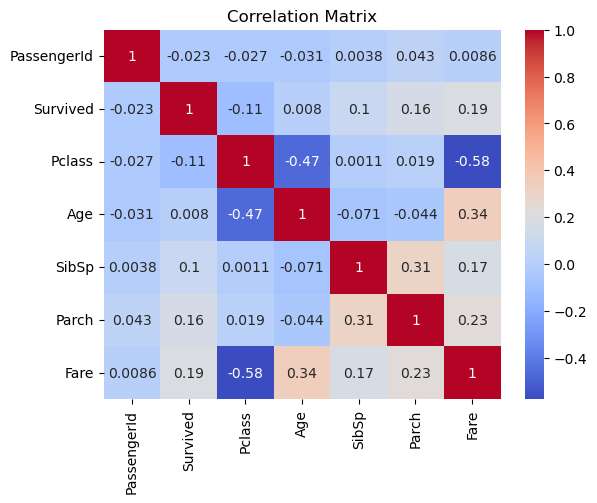

In [11]:
correlation_matrix = Titanic.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


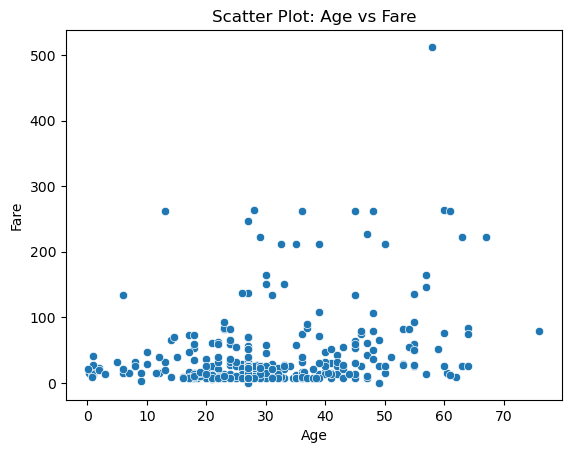

In [12]:
sns.scatterplot(data=Titanic, x='Age', y='Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Scatter Plot: Age vs Fare')
plt.show()


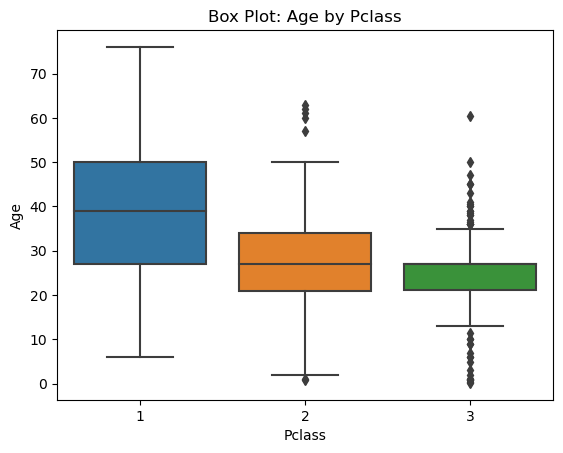

In [13]:
sns.boxplot(data=Titanic, x='Pclass', y='Age')
plt.xlabel('Pclass')
plt.ylabel('Age')
plt.title('Box Plot: Age by Pclass')
plt.show()


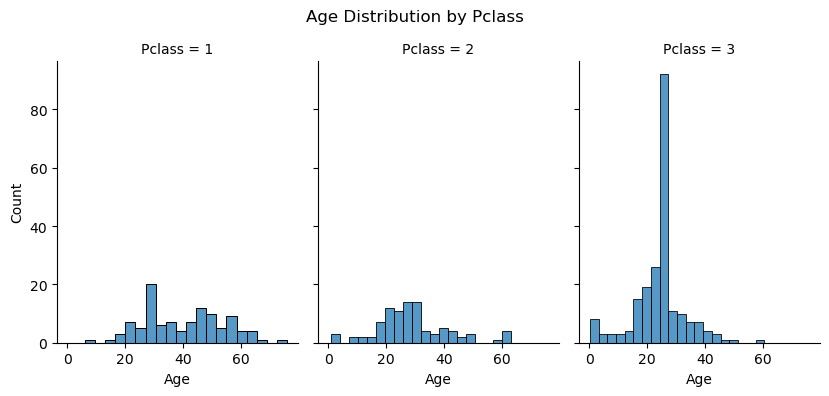

In [14]:
g = sns.FacetGrid(data=Titanic, col='Pclass', height=4, aspect=0.7)
g.map(sns.histplot, 'Age', bins=20)
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Age Distribution by Pclass')
plt.show()


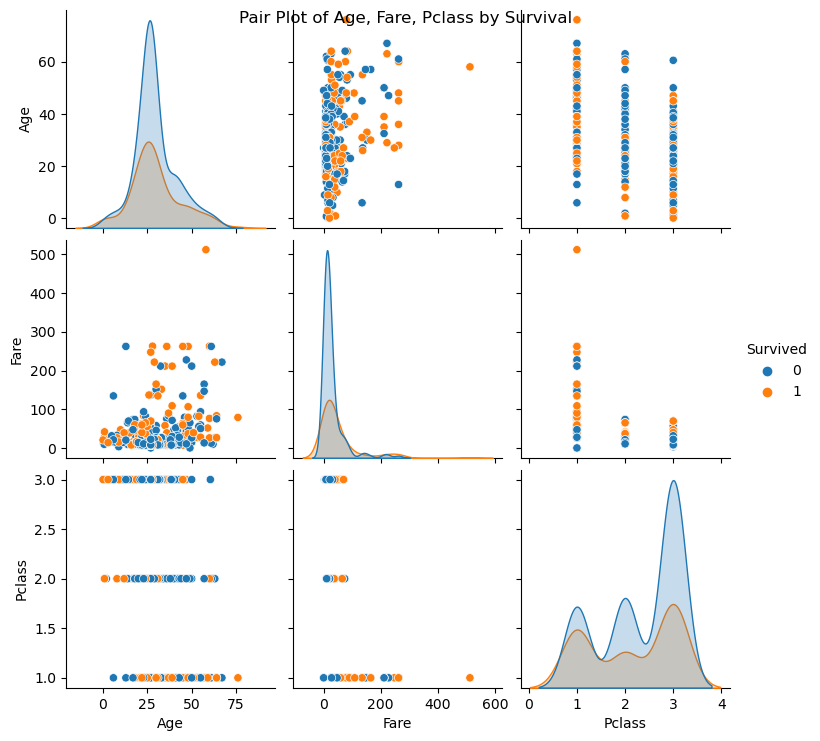

In [15]:
sns.pairplot(data=Titanic, vars=['Age', 'Fare', 'Pclass'], hue='Survived')
plt.suptitle('Pair Plot of Age, Fare, Pclass by Survival')
plt.show()


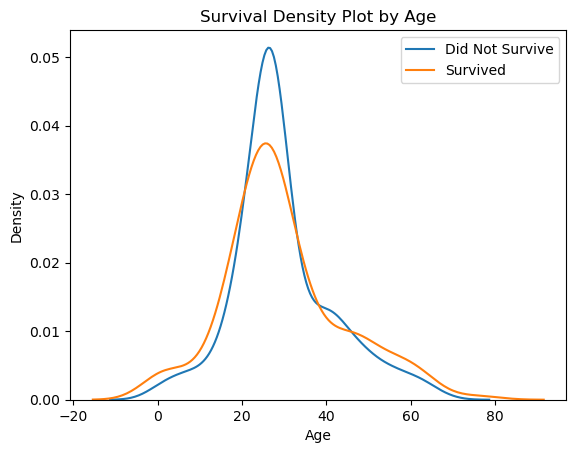

In [16]:
sns.kdeplot(data=Titanic[Titanic['Survived'] == 0]['Age'], label='Did Not Survive')
sns.kdeplot(data=Titanic[Titanic['Survived'] == 1]['Age'], label='Survived')
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Survival Density Plot by Age')
plt.legend()
plt.show()


In [17]:
Titanic['FamilySize'] = Titanic['SibSp'] + Titanic['Parch']


In [18]:
bins = [0, 12, 18, 60, 120]
labels = ['Child', 'Teen', 'Adult', 'Senior']
Titanic['AgeGroup'] = pd.cut(Titanic['Age'], bins=bins, labels=labels)


In [19]:
fare_bins = [0, 10, 50, 1000]
fare_labels = ['Low', 'Medium', 'High']
Titanic['FareCategory'] = pd.cut(Titanic['Fare'], bins=fare_bins, labels=fare_labels)


In [20]:
Titanic['FarePerPerson'] = Titanic['Fare'] / (Titanic['FamilySize'] + 1)


In [21]:
print(Titanic.head())


   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Embarked  FamilySize AgeGroup FareCategory  FarePerPerson  
0   330911   7.8292        Q           0    Adult          Low       7.829200  
1   363272   7.0000        S           1    Adult          Low       3.500000  
2   240276   9.6875        Q           0   Senior          Low      

In [22]:
Titanic['Title'] = Titanic['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


In [23]:
print(Titanic['Title'].value_counts())


Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64


In [24]:
# Encoding Categorical Variables
from sklearn.preprocessing import LabelEncoder

# Encoding 'Sex' column
label_encoder = LabelEncoder()
Titanic['SexEncoded'] = label_encoder.fit_transform(Titanic['Sex'])

# Encoding 'Embarked' column
Titanic = pd.get_dummies(Titanic, columns=['Embarked'], drop_first=True)

# Encoding 'Title' column
label_encoder = LabelEncoder()
Titanic['TitleEncoded'] = label_encoder.fit_transform(Titanic['Title'])

# Define features and target variable
features = ['Pclass', 'SexEncoded', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S', 'FamilySize', 'FarePerPerson', 'TitleEncoded']
X = Titanic[features]
y = Titanic['Survived']

# Rest of your code for data splitting, model training, and evaluation


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


Accuracy: 1.0
Confusion Matrix:
 [[50  0]
 [ 0 34]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



C:\Users\ASUS 1\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
from sklearn.model_selection import cross_val_score

model = LogisticRegression(random_state=42)
scores = cross_val_score(model, X, y, cv=5)  # 5-fold cross-validation
print("Cross-Validation Scores:", scores)
print("Mean CV Score:", scores.mean())


Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean CV Score: 1.0


C:\Users\ASUS 1\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ASUS 1\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

In [27]:
model = LogisticRegression(random_state=42, max_iter=1000)


In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [29]:
model = LogisticRegression(random_state=42, solver='liblinear')


In [30]:
model = LogisticRegression(random_state=42, penalty='l2')


In [34]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

feature_importances = model.feature_importances_
print("Feature Importances:", feature_importances)



Feature Importances: [0.00412936 0.61795815 0.01799768 0.00644001 0.01043817 0.02602412
 0.00873908 0.0033307  0.01307971 0.02723242 0.26463059]


In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define features and target variable
features = ['Pclass', 'SexEncoded', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S', 'TitleEncoded']

X = Titanic[features]
y = Titanic['Survived']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


Accuracy: 1.0
Confusion Matrix:
 [[50  0]
 [ 0 34]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [49]:
# Creating a new DataFrame for the test data
test_data = Titanic.loc[X_test.index].copy()

# Making predictions on the test data
y_pred = model.predict(X_test)

# Adding the predictions to the test data DataFrame
test_data['PredictedSurvived'] = y_pred




In [50]:
# Check the predicted values against the actual values
comparison = test_data[['Survived', 'PredictedSurvived']]
print(comparison)


     Survived  PredictedSurvived
321         0                  0
324         1                  1
388         0                  0
56          0                  0
153         1                  1
..        ...                ...
57          0                  0
126         0                  0
24          1                  1
17          0                  0
66          1                  1

[84 rows x 2 columns]


In [55]:
print(test_data)


     PassengerId  Survived  Pclass  \
321         1213         0       3   
324         1216         1       1   
388         1280         0       3   
56           948         0       3   
153         1045         1       3   
..           ...       ...     ...   
57           949         0       3   
126         1018         0       3   
24           916         1       1   
17           909         0       3   
66           958         1       3   

                                                Name     Sex   Age  SibSp  \
321                            Krekorian, Mr. Neshan    male  25.0      0   
324                           Kreuchen, Miss. Emilie  female  39.0      0   
388                             Canavan, Mr. Patrick    male  21.0      0   
56                                   Cor, Mr. Bartol    male  35.0      0   
153   Klasen, Mrs. (Hulda Kristina Eugenia Lofqvist)  female  36.0      0   
..                                               ...     ...   ...    ...   
57  

In [58]:
# Save the DataFrame with predicted values to a CSV file
test_data.to_csv('predicted_data.csv', index=False)


In [60]:
import os

# List all files in the current directory
files_in_directory = os.listdir()

# Check if 'predicted_data.csv' is in the list of files
if 'predicted_data.csv' in files_in_directory:
    print("'predicted_data.csv' file has been successfully created.")
else:
    print("'predicted_data.csv' file was not found.")


'predicted_data.csv' file has been successfully created.


In [61]:
import os
print(os.getcwd())


C:\Users\ASUS 1
